#### import the packages

In [202]:
# data handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# stats testing | hypothesis testing
import scipy.stats as stats

# statistical modelling
import statsmodels.formula.api as smf

# subpackages from sklearn for data handling, variable selection and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# for modelling - stats and ML
import sklearn
from sklearn.linear_model import LinearRegression

#### import the data

In [5]:
cars = pd.read_csv('car_sales.csv')

#### get the UDFs

In [6]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

#### EDA

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

##### get the object type and numeric variables as separate datasets

In [8]:
# new datasets, will consume extra memory
cars_object = cars.select_dtypes('object')
cars_numeric = cars.select_dtypes('float64')

# OR 

# variables with the object type and numeric type
cars_object_variable = cars.select_dtypes('object').columns
cars_numeric_variables = cars.select_dtypes('float64').columns
# cars[cars_object_variable]
# cars[cars_numeric_variables]

##### get the numeric data summary

In [9]:
cars_numeric.apply( continuous_var_summary )
# cars_numeric.apply( continuous_var_summary ).to_excel('C:/Users/HP/Desktop/DSP - June 22/3. Advance Analytics/summary.xlsx')

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,157,117,152,31,66,88,78,127,147,55,20,154
n_tot,157,157,157,157,157,157,157,157,157,157,157,157
n,157,121,155,156,156,156,156,156,155,156,154,155
nmiss,0,36,2,1,1,1,1,1,2,1,3,2
perc_miss,0.0,22.929936,1.273885,0.636943,0.636943,0.636943,0.636943,0.636943,1.273885,0.636943,1.910828,1.273885
sum,8320.698,2186.83,4245.567,477.5,29008.0,16768.0,11099.4,29225.6,523.594,2800.5,3672.0,11941.756636
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.15,187.34359,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
var,4628.002257,131.180007,205.969949,1.0913,3214.926385,58.389512,11.915419,180.412023,0.397532,15.115932,18.341567,632.153558


In [10]:
cars_object.describe()

,Manufacturer,Model,Vehicle_type,Latest_Launch
count,157,157,157,157
unique,30,156,2,130
top,Dodge,Neon,Passenger,10/5/2012
freq,11,2,116,2


##### get the following inferrences

1. categorical vs continuous variables

2. look for the outliers 

3. missings

4. date or time data

5. duplicates

##### outlier treatments

In [11]:
cars_numeric = cars_numeric.apply( lambda x: x.clip( lower = x.quantile(0.01), 
                                                                upper = x.quantile(0.99) ) )

##### missing value imputaion

In [12]:
cars_numeric = cars_numeric.apply( lambda x: x.fillna( x.mean() ))

##### summary of the continuous (numeric) data

In [13]:
cars_numeric.apply( continuous_var_summary )

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,155,116,151,30,65,88,77,126,146,55,20,153
n_tot,157,157,157,157,157,157,157,157,157,157,157,157
n,157,157,157,157,157,157,157,157,157,157,157,157
nmiss,0,0,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,8025.5292,2829.141298,4290.61297,478.860064,29095.622436,16867.536538,11173.619551,29411.272949,530.528485,2817.848077,3731.298701,12065.384534
mean,51.11802,18.020008,27.328745,3.050064,185.322436,107.436538,71.169551,187.332949,3.379162,17.948077,23.766234,76.849583
std,57.722699,9.80668,13.973525,0.979125,52.646914,7.400461,3.379455,13.07823,0.617766,3.807591,3.956157,23.691622
var,3331.909938,96.170969,195.259402,0.958686,2771.697606,54.766822,11.420718,171.04011,0.381634,14.497753,15.651182,561.292961


#### handling the categorical features

In [22]:
cars_object.nunique()

Manufacturer      30
Model            156
Vehicle_type       2
Latest_Launch    130
dtype: int64

** dropping the model and latest launch variables

In [29]:
cars_object = pd.get_dummies( cars_object.loc[:, ['Manufacturer', 'Vehicle_type']], drop_first = True )

In [30]:
cars_object.columns

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger'],
      dtype='object')

In [31]:
cars_object.rename( columns = {'Manufacturer_Mercedes-B':'Manufacturer_Mercedes_B'}, inplace = True)

#### combine the categorical and continuous variables

as we dont have any numeric variable as categorical. we can proceed to join object type and numeric data variables into one dataset

In [32]:
cars_new = pd.concat( [ cars_object, cars_numeric ], axis = 1 )

In [33]:
cars_new.shape

(157, 42)

#### LR - based on many assumptions, 10 of them are critical**

1. All the variables should follow the normal distribution, if not all atleast y must follow normal distribution


2. y should be linearly related with X variables


3. No of obs must always be more than no of X variables


4. X variables should be independent



** Other assumtions will check later

Resid should follow normal distribution

##### check for y variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


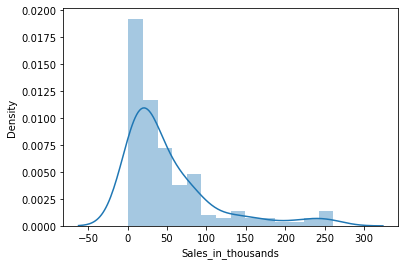

In [35]:
# Very first assumtion is that all the variables should be normally distributed, however that can't be possible
# However we have to be atleast strict about the dependant Y variable

# Distribution of variables
sns.distplot(cars_new.Sales_in_thousands)
plt.show()
# this distribution is highly skewed

# Notes:
#-----------------------------------------------------
# 1. if we get skewed data, then we have to transform the data and there are multiple methods to go about it
# 2. most commonly used and which works on most of the data is log transformation
# 3. Ideally we can do this for each of the dependant variable as well, 
#    however it will depend on amount of data and the amount of analytical rigour
# 4. In no case we can proceed if dependant variable is not normal/near to normal distributed

In [36]:
cars_new.Sales_in_thousands.skew()

1.9924932920508793

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


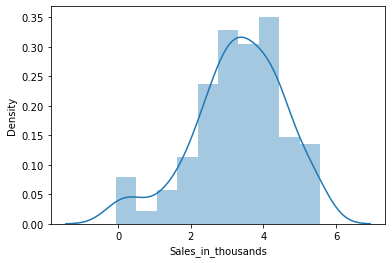

In [37]:
sns.distplot( np.log(cars_new.Sales_in_thousands) )
plt.show()

In [38]:
np.log(cars_new.Sales_in_thousands).skew()

-0.5925861100519006

In [39]:
cars_new.loc[:, 'ln_sales_in_thousands'] = np.log(cars_new.Sales_in_thousands)

#### correl

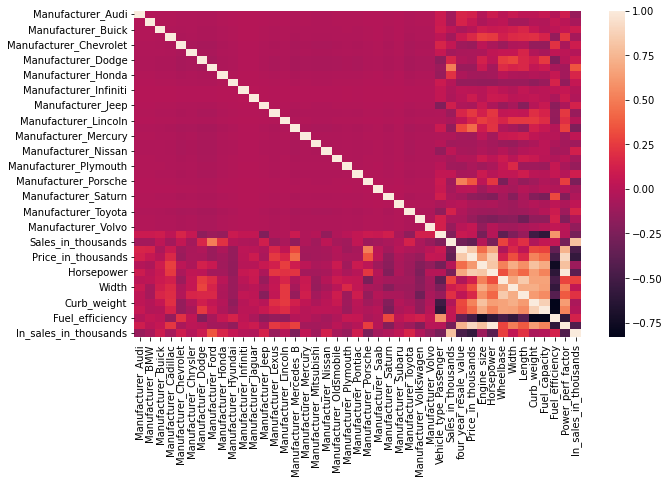

In [43]:
plt.figure( figsize=(10, 6) )
sns.heatmap( cars_new.corr() )
plt.show()

In [44]:
cars_new.corr().to_excel('corr.xlsx')

#### variable selection | feature selection

1. Significance

2. Multi - colinearity

In [108]:
# get only the X variable names
features = cars_new.columns.difference(['ln_sales_in_thousands', 'Sales_in_thousands'])

In [109]:
features

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [110]:
# get the significant variables : bi-variate regression
from sklearn.feature_selection import f_regression

In [111]:
# bivariate regression
f_score, p_value = f_regression( cars_new[features], cars_new.ln_sales_in_thousands )

In [112]:
# combine the outputs in the dataframe
significant_variables = pd.DataFrame([features, f_score, p_value]).T
significant_variables.columns = [ 'features', 'f_score', 'p_value' ]
features = list( significant_variables.loc[ significant_variables.p_value <= 0.1, 'features' ] )

In [113]:
features

['Fuel_efficiency',
 'Horsepower',
 'Length',
 'Manufacturer_Audi',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Mercedes_B',
 'Manufacturer_Plymouth',
 'Manufacturer_Porsche',
 'Manufacturer_Toyota',
 'Manufacturer_Volvo',
 'Power_perf_factor',
 'Price_in_thousands',
 'Vehicle_type_Passenger',
 'Wheelbase',
 'four_year_resale_value']

##### multi-colinearity

In [114]:
# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [115]:
model_param = 'ln_sales_in_thousands ~ ' + ' + '.join(features)
model_param

'ln_sales_in_thousands ~ Fuel_efficiency + Horsepower + Length + Manufacturer_Audi + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Mercedes_B + Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + Manufacturer_Volvo + Power_perf_factor + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + four_year_resale_value'

In [135]:
model_param = '''ln_sales_in_thousands ~ Fuel_efficiency + 
        Manufacturer_Audi + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Mercedes_B + 
        Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + Manufacturer_Volvo + 
        Price_in_thousands + Vehicle_type_Passenger + Wheelbase'''

In [136]:
# separate the Y and X variables
y, X = dmatrices( model_param, cars_new, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range( X.shape[1] ) ]

In [140]:
features = list( vif.loc[ 1:, 'Features'] )

#### Modelling steps - train test split

In [73]:
# get only the X variable names
features = cars_new.columns.difference(['ln_sales_in_thousands', 'Sales_in_thousands'])

In [76]:
# Method 1 - required for methods from statsmodels
train, test = train_test_split( cars_new, test_size = 0.3, random_state = 1 )

# Method 2 - required for methods from sklearn
X_train, X_test, y_train, y_test = train_test_split( cars_new[features], 
                            cars_new.ln_sales_in_thousands, test_size = 0.3, random_state = 1 )

##### Steps for model building:
------------------------------------------------------------------
Step 1: lm = smf.ols('y~x1+x2+x3...xn', data = train) # defining Y and X with classs

Step 2: lm.fit()     # building model (estimating the betas)

Step 3: lm.summary() # get the output summary of the model

Step 4: lm.predict(train) # predict the sales on the training data

Step 5: lm.predict(test) # predict the sales on the testing/validation data

Step 6: test the accuracy of the model
    a.  MAPE: Mean Absolute Percentage Error
    b.  RMSE: Root Mean Square Error
    c.  Corelation between actual and predicted
    d.  Decile analysis: for validation of models - Business validation
    
    
R square:
1 - SSE(best fit) / SSE(no slope)

Adjusted R square:
1 - [(1 - R2)(n - 1) / (n - k - 1)]



#### Model 0 

In [82]:
# create a formula
formula_m0 = 'ln_sales_in_thousands ~ ' + ' + '.join( features )

In [84]:
# define a model equation
lm0 = smf.ols( formula = formula_m0, data = train )

In [85]:
# fit the model or execute the model
lm0 = lm0.fit()

In [87]:
# model summary for stablity
print( lm0.summary() )

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.700
Model:                               OLS   Adj. R-squared:                  0.523
Method:                    Least Squares   F-statistic:                     3.962
Date:                   Sat, 20 Aug 2022   Prob (F-statistic):           3.00e-07
Time:                           11:39:10   Log-Likelihood:                -112.66
No. Observations:                    109   AIC:                             307.3
Df Residuals:                         68   BIC:                             417.7
Df Model:                             40                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

#### Model 1

In [88]:
# define the formula
formula_m1 = '''ln_sales_in_thousands ~ Price_in_thousands + Manufacturer_Ford + Length + 
Fuel_efficiency + Vehicle_type_Passenger'''

In [90]:
# define and fit the model
lm1 = smf.ols( formula = formula_m1, data = train ).fit()

In [91]:
# summary of the model
print(lm1.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.493
Model:                               OLS   Adj. R-squared:                  0.469
Method:                    Least Squares   F-statistic:                     20.06
Date:                   Sat, 20 Aug 2022   Prob (F-statistic):           6.39e-14
Time:                           12:06:37   Log-Likelihood:                -141.17
No. Observations:                    109   AIC:                             294.3
Df Residuals:                        103   BIC:                             310.5
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Model 2

In [143]:
# after the variable selection
features

['Fuel_efficiency',
 'Manufacturer_Audi',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Mercedes_B',
 'Manufacturer_Plymouth',
 'Manufacturer_Porsche',
 'Manufacturer_Toyota',
 'Manufacturer_Volvo',
 'Price_in_thousands',
 'Vehicle_type_Passenger',
 'Wheelbase']

In [146]:
# define the formula
formula_m2 = 'ln_sales_in_thousands ~ ' + ' + '.join(features)

In [147]:
# define and fit the model
lm2 = smf.ols( formula = formula_m2, data = train ).fit()

In [148]:
# summary of the model
print(lm2.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.549
Model:                               OLS   Adj. R-squared:                  0.492
Method:                    Least Squares   F-statistic:                     9.725
Date:                   Sat, 20 Aug 2022   Prob (F-statistic):           4.05e-12
Time:                           12:44:03   Log-Likelihood:                -134.87
No. Observations:                    109   AIC:                             295.7
Df Residuals:                         96   BIC:                             330.7
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

#### Model 3

In [149]:
formula_m2

'ln_sales_in_thousands ~ Fuel_efficiency + Manufacturer_Audi + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Mercedes_B + Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + Manufacturer_Volvo + Price_in_thousands + Vehicle_type_Passenger + Wheelbase'

In [185]:
# define the formula
formula_m3 = '''ln_sales_in_thousands ~ Fuel_efficiency + 
        Manufacturer_Ford  + 
        Price_in_thousands + Vehicle_type_Passenger + 
        Length'''

In [186]:
# define and fit the model
lm3 = smf.ols( formula = formula_m3, data = train ).fit()

In [187]:
# summary of the model
print(lm3.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.493
Model:                               OLS   Adj. R-squared:                  0.469
Method:                    Least Squares   F-statistic:                     20.06
Date:                   Sat, 20 Aug 2022   Prob (F-statistic):           6.39e-14
Time:                           12:52:17   Log-Likelihood:                -141.17
No. Observations:                    109   AIC:                             294.3
Df Residuals:                        103   BIC:                             310.5
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### predict the output

In [194]:
# predict the output on train
train['y_predict'] = np.exp( lm3.predict( train ) )

# predict the output on test
test['y_predict'] = np.exp( lm3.predict( test ) )

#### evaluate the model for accuracy

In [199]:
# get the mse
train_MSE = mean_squared_error( train.Sales_in_thousands, train.y_predict )
test_MSE = mean_squared_error( test.Sales_in_thousands, test.y_predict )

# get the rmse
train_RMSE = np.sqrt( train_MSE )
test_RMSE = np.sqrt( test_MSE )

# get the mae
train_MAE = mean_absolute_error( train.Sales_in_thousands, train.y_predict )
test_MAE = mean_absolute_error( test.Sales_in_thousands, test.y_predict )

# get the mape
train_MAPE = mean_absolute_percentage_error( train.Sales_in_thousands, train.y_predict )
test_MAPE = mean_absolute_percentage_error( test.Sales_in_thousands, test.y_predict )

# print the output
print( 'MSE Train: ', train_MSE, ' | MSE test: ', test_MSE )
print( 'RMSE Train: ', train_RMSE, ' | RMSE test: ', test_RMSE )
print( 'MAE Train: ', train_MAE, ' | MAE test: ', test_MAE )
print( 'MAPE Train: ', train_MAPE, ' | MAPE test: ', test_MAPE )

MSE Train:  2315.3520045151704  | MSE test:  2397.4319234981995
RMSE Train:  48.11810474774719  | RMSE test:  48.963577519399045
MAE Train:  28.429626942208685  | MAE test:  29.524999654657808
MAPE Train:  1.1318078564611471  | MAPE test:  0.7221050338921932


#### corel

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='y_predict'>

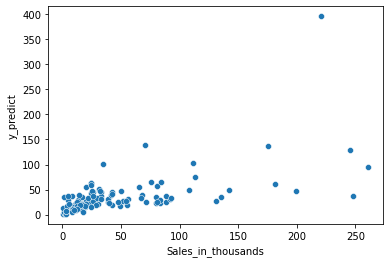

In [201]:
sns.scatterplot( train.Sales_in_thousands, train.y_predict )